# Latar Belakang

Sistem jual beli mengalami perubahan yang signifikan, termasuk jual beli online. Customer dimudahkan dengan pemesanan via online dan barang akan dikirimkan sesuai alamat. Pengiriman merupakan hal yang sangat penting dari berkembangnya jual beli online. Dari situlah melahirkan perusahaan jasa ekspedisi pengiriman yang dibutuhkan oleh pelaku bisnis online. Semakin beragamnya perusahaan ekspedisi, melahirkan persaingan yang sehat sehingga perusahaan harus dapat bersaing menjadi yang tercepat dan terjangkau. Suatu perusahaan ekspedesi ingin membentuk strategi untuk dapat bersaing dengan perusahaan lain. Kepuasan pelanggan merupakan satu parameter untuk dapat bersaing dengan pesaing. Pada setiap pembelian, pelanggan memberikan rating terhadap perusahaan. Perusahaan ingin melihat bagaimana rating yang diberikan oleh pelanggan.

# Pernyataan Masalah

Perusahaan ingin mengingkatkan kepuasan pelanggan mereka. Untuk mencapai tujuan tersebut, mereka ingin memanfaatkan data yang ada untuk mengetahui berapa rating yang diberikan oleh perusahaan dan mengidentifikasi pola/ tren layanan perusahaan yang dapat diberikan perbaikan/ improvement. 

Sebagai seorang data analyst yang ditugaskan untuk proyek ini, tujuan utama adalah membantu perusahaan dalam mengidentifikasi tren dan pola dalam data mereka untuk memperbaiki layanan perusahaan. Hasil dari analisa ini akan menjadi bahan pertimbangan kepada stakeholder yaitu Senior Manager Logistik.

# Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [disini](https://drive.google.com/drive/folders/1qDcYH_h5-7v6Z9h6MlWiEC8wtY7TFp9Z).

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.lines import Line2D
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings("ignore")


Dataset ini berisi informasi terkait data pengiriman retail online. Ada 12 kolom di dalam dataset Online Retail Shipping, yaitu:

* ID : Nomor ID pelanggan.
* Warehouse_block :Perusahaan memiliki gudang besar yang dibagi menjadi beberapa blok (A-E).
* Mode_of_shipment : Perusahaan mengirimkan produk dengan berbagai cara (Ship, flight, road).
* Customer_care_calls: Jumlah panggilan yang dilakukan dari pertanyaan untuk pertanyaan
Pengiriman.
* Customer_rating: Rating dari setiap pelanggan. 1 adalah yang terendah, dan 5 adalah yang tertinggi.
* Cost_of_the_product: Harga produk dalam Dolar AS.
* Prior_purchases: Jumlah pembelian sebelumnya.
* Product_importance: Perusahaan telah mengkategorikan produk dalam berbagai parameter(low, medium, high)
* Gender: Pria dan wanita.
* Discount_offered: Diskon yang ditawarkan pada produk tertentu.
* Weight_in_gms: Berat dalam gram.
* Reached.on.Time_Y.N : 1 menunjukkan bahwa produk belum tiba tepat waktu, dan 0 menunjukkan produk telah tiba tepat waktu


Berikut 5 baris teratas dan terbawah dari dataset Online Retail Shipping.





In [87]:
df = pd.read_csv('Online Retail Shipping.csv')
display(df.head(),df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


Data Formatting

In [88]:
df = df.rename(columns={'Reached.on.Time_Y.N': 'Reached.Not.on.Time_Y.N'})
display(df.head(),df.tail())


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.Not.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.Not.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


Pada dataframe ini dilakukan formatting dengan mengubah nama kolom 'Reached.on.Time_Y.N' menjadi 'Reached.Not.on.Time_Y.N' karena akan lebih sesuai dengan keterangan indeks 0 berarti tepat waktu, dan indeks 1 berarti terlambat.

 ## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Online Retail Shipping.

In [89]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (10999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       10999 non-null  int64 
 1   Warehouse_block          10999 non-null  object
 2   Mode_of_Shipment         10999 non-null  object
 3   Customer_care_calls      10999 non-null  int64 
 4   Customer_rating          10999 non-null  int64 
 5   Cost_of_the_Product      10999 non-null  int64 
 6   Prior_purchases          10999 non-null  int64 
 7   Product_importance       10999 non-null  object
 8   Gender                   10999 non-null  object
 9   Discount_offered         10999 non-null  int64 
 10  Weight_in_gms            10999 non-null  int64 
 11  Reached.Not.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [90]:
m = df.shape[0]
n = df.shape[1]

print("Number of rows: " + str(m))
print("Number of columns: " + str(n))

Number of rows: 10999
Number of columns: 12


In [91]:
display(df.describe(), df.describe(include='object'))

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.Not.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


1. **Jumlah Data**
    - DataFrame Online Retail Shipping adalah 10.999 baris. 
2. **Statistik Deskriptif**:
    - Customer_care_calls : Rata-rata panggilan yang dilakukan oleh pelanggan adalah sekitar 4 panggilan, dengan nilai minimum 2 maksimum 7.
    - Customer_rating : Rata-rata rating pelanggan adalah sekitar 2,99 dibulatkan menjadi 3, karena pada pilihan rating yang ada adalah 3. Dengan rating terendah adalah 1 dan rating tertinggi adalah 5.
    - Cost_of_the_Product : Rata-rata cost of the product/ harga produk aadalah berkisar 210.20,dengan harga terendah sebesar 96, dan harga tertinggi sebesar 310.
    - Prior_purchases: Rata-rata pembelian sebelumnya adalah sekitar 3.57 (dibulatkan sebesar 4) dengan jumlah pembelian sebelumnya paling kecil di angka 2 dan jumlah pembelian sebelumnya tertinggi di angka 10.
    - Discount_offered : Rata-rata diskon yang ditawarkan adalah sekitar 13.37 %, dengan diskon tertinggi sebesar 65 % dan diskon terendah sebesar 1 %.
    - Weight_in_gms : Rata-rata berat dakam gram adalah sejutar 3634.02 gram, dengan berat terendah sebesar  1001 gram dan berat tertinggi sebesar 7846 gram.
3. **Distribusi Kategorikal**
    - Reached.Not.on.Time_Y.N : Walaupun berupa angka, kolom ini merupakan data kategorikal yaitu terdapat 2 pilihan dengan nilai 0 berarti tepat waktu dan 1 berarti terlambat.
    - Warehouse_Block : Terdapat 5 blok gudang yang berbeda (A, B, C, D, E dan F). Kemudian nilai yang paling sering muncul adalah 'F' dengan frekuensi sebanyak 3666 kali.
    - Mode-of_Shipment : Terdapat 3 pengiriman yang berbeda (Flight, Ship, dan Road). Nilai yang paling sering muncul adalah 'Ship' dengan frekuensi sebanyak 7462 kali.
    - Product_importance : Terdapat 3 tingkat pentingnya produk(low, medium, dan high). Top/ nilai yang paling seing muncul adalah low dengan frekuensi sebanyak 5297 kali.
    - Gender : Terdapat 2 jenis kelamin (pria dan wanita) dengan nilai yang paling sering muncul adalah 'female' sebanyak 5545 kali.

In [92]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,3,"[Flight, Ship, Road]"
3,Customer_care_calls,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,3,"[low, medium, high]"
8,Gender,2,"[F, M]"
9,Discount_offered,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


# Missing Value

In [93]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                         0.0
Warehouse_block            0.0
Mode_of_Shipment           0.0
Customer_care_calls        0.0
Customer_rating            0.0
Cost_of_the_Product        0.0
Prior_purchases            0.0
Product_importance         0.0
Gender                     0.0
Discount_offered           0.0
Weight_in_gms              0.0
Reached.Not.on.Time_Y.N    0.0
dtype: float64

In [94]:

df.shape

(10999, 12)

In [95]:
df.dtypes

ID                         int64 
Warehouse_block            object
Mode_of_Shipment           object
Customer_care_calls        int64 
Customer_rating            int64 
Cost_of_the_Product        int64 
Prior_purchases            int64 
Product_importance         object
Gender                     object
Discount_offered           int64 
Weight_in_gms              int64 
Reached.Not.on.Time_Y.N    int64 
dtype: object

In [96]:
df.isna().sum()

ID                         0
Warehouse_block            0
Mode_of_Shipment           0
Customer_care_calls        0
Customer_rating            0
Cost_of_the_Product        0
Prior_purchases            0
Product_importance         0
Gender                     0
Discount_offered           0
Weight_in_gms              0
Reached.Not.on.Time_Y.N    0
dtype: int64

Secara garis besar:
* Tidak ada *missing value* pada setiap baris dan kolom di dalam dataframe Online Retail Shipping. Seluruh data di dalam dataframe Online Retail Shipping sudah lengkap dan tidak ada nilai kosong atau hilang. Hal ini dapat memudahkan analisis data dan menghasilkan output yang lebih akurat karena tidak ada data yang hilang yang dapat mengganggu hasil analisis. Namun, perlu diingat bahwa tidak adanya missing value tidak selalu menjamin kualitas data yang baik, karena terkadang data yang lengkap teteapi tidak valid atau representatif dapat menghasilkan analisis yang salah. 

Data Duplikat

In [97]:
dup_df = df[df.duplicated()]
print(dup_df)

Empty DataFrame
Columns: [ID, Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms, Reached.Not.on.Time_Y.N]
Index: []


Empty DataFrame ini menunjukkan bahwa tidak ada baris yang terduplikat dalam dataframe. Ini berarti setiap baris dalam dataframe memiliki nilai yang unik. Apabila terdapat data duplikat akan menjadi masalah karena dapat menyebabkan analisis yang salah atau informasi yang tidak akurang, sehingga diperlukan pengecekan dan menghapus data duplikat dalam dataframe sebelum melakukan analisis.

Data Formatting

Dilakukan penghapusan kolom ID pada datafram retail online shipping karena kolom "ID" tidadk diperlukan dalam analisis ataupun pengolahan data, sehingga karena tidak memberikan kontribusi signidikan terhadap hasil analisis atau tidak sesuai dengan tujuan analisis yang ingin dilakukan. Penghapusan kolom "ID" juga dapat membantu dalam mengurangi dimensi data dan meningkatkan efisiensi proses analisis.

In [98]:
df = df.drop("ID", axis=1)

In [99]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.Not.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


# Data telah bersih

Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [100]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(10999, 11)


,dataFeatures,dataType,null,unique,uniqueSample
0,Warehouse_block,object,0,5,"[D, B]"
1,Mode_of_Shipment,object,0,3,"[Ship, Road]"
2,Customer_care_calls,int64,0,6,"[2, 6]"
3,Customer_rating,int64,0,5,"[5, 4]"
4,Cost_of_the_Product,int64,0,215,"[142, 287]"
5,Prior_purchases,int64,0,8,"[5, 7]"
6,Product_importance,object,0,3,"[medium, low]"
7,Gender,object,0,2,"[F, M]"
8,Discount_offered,int64,0,65,"[40, 29]"
9,Weight_in_gms,int64,0,4034,"[4230, 3277]"


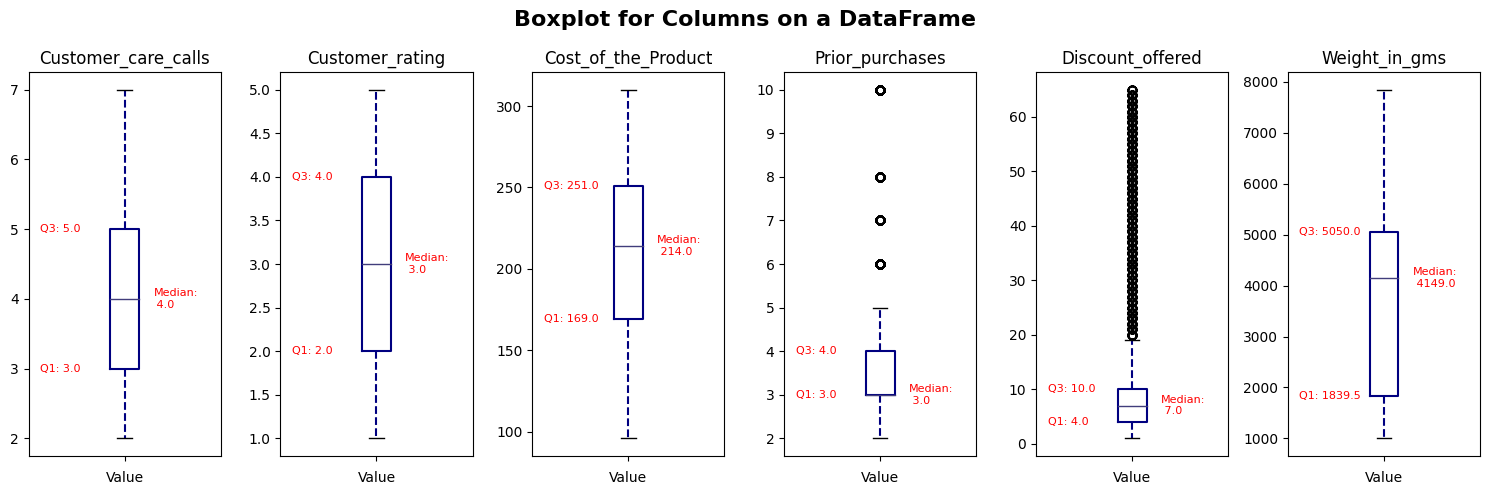

In [101]:
import numpy as np
import matplotlib.pyplot as plt

column_to_plot = ["Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Discount_offered", "Weight_in_gms"]

fig, axes = plt.subplots(nrows=1, ncols=len(column_to_plot), figsize=(15, 5))

boxprops = dict(linestyle='-', linewidth=1.5, color='navy')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='navy')

for i, column in enumerate(column_to_plot):

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    median = df[column].median()

    axes[i].boxplot(df[column], vert=True, boxprops=boxprops, whiskerprops=whiskerprops)
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel("Value", fontsize=10)
    axes[i].set_xticklabels([])


    x_offset = 0.05  
    q1_x = 0.51 + x_offset
    q3_x = 0.51 + x_offset
    median_x = 1.10 + x_offset

    axes[i].text(q1_x, q1, f"Q1: {q1}", ha='left', va='center', color='red', fontsize=8)
    axes[i].text(q3_x, q3, f"Q3: {q3}", ha='left', va='center', color='red', fontsize=8)
    axes[i].text(median_x, median, f"Median:\n {median}", ha='left', va='center', color='red', fontsize=8)

fig.suptitle("Boxplot for Columns on a DataFrame", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()


In [102]:
# Menampilkan jumlah outlier pada setiap kolom di DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

outlier_count = outlier.sum()

print(outlier_count)

Cost_of_the_Product        0   
Customer_care_calls        0   
Customer_rating            0   
Discount_offered           2209
Gender                     0   
Mode_of_Shipment           0   
Prior_purchases            1003
Product_importance         0   
Reached.Not.on.Time_Y.N    0   
Warehouse_block            0   
Weight_in_gms              0   
dtype: int64


Pada boxplot dapat dilihat bagaimana penyebaran data diantaranya outlier, batas atas, dan batas bawah. Setiap grafik kotak (boxplot) mewakili kolom yang berbeda dari suatu DataFrame. Dibawah ini adalah analisa masing-masing boxplot:

1. Customer_care_calls
    Menggambarkan distribusi data jumlah panggilan pelanggan ke pusat layanan pelanggan. Median menunjukan nilai tengah data sebesar 4 kali, sedangakan batas atas sebesar 5 kali dan batas bawah sebesar 3 kali. Tidak ada outlier pada customer_care_calls. 
2. Customer_rating
    Boxplot pada customer rating menggambarkan distribusi penilaian pelanggan terhadap produk. Median sebesar 3, batas atas adalah 4, dan batas bawah adalah 2. Sementara, tidak ada outlier pada kolom ini.
3. Cost_of_the_Product
    Boxplot Cost_of_the_Product menunjukkan distribusi biaya produk. Median adalah sebesar 214, batas atas adalah 251, dan batas bawah adalah 169. Pada kolom ini tidak ada outlier yang terdeteksi.
4. Prior_purchases
    Pada boxplot Prior_purchases menggambarkan distribusi jumlah pembelian sebelumnya oleh pelanggan. Batas atas sebesar 4, batas bawah sebesar 3, dan median sebesar 3. Namun, pada kolom ini terdapat outlier yang terdeteksi sebanyak 1003 baris. Namun, outlier ini adalah pembelian sebelumnya oleh pelanggan diatas 4 kali dimana hal ini masih dalam batas wajar sehingga outlier pada kolom ini tidak perlu dihapus.
5. Discount_offered
    Pada boxplot Discount_offered menunjukkan distribusi diskon yang ditawarkan pada produk. Batas atas sebesar 10, batas bawah sebesar 4, dan median sebesar 7. Sementara terdeteksi outlier yang cukup banyak pada kolom Discount_offered yaitu sebesar 2209 baris. Namun, outlier yang ada adalah diskon yang diberikan masih dalam range dibawah 70 % sehingga outlier pada kolom ini tidak perlu dihapus.
6. Weight_in_gms
    Boxplot Weight_in_gms menggambarkan distribusi berat produk dalam gram. Batas atas sebesar 5050 gram, batas bawah sebesar 1839.5 gram, dan median sebesar 4149 gram.


# Data Analysis

Selanjutnya, kita bisa mulai melakukan analisis untuk mencari tahu bagaimana rating diberikan ke perusahaan apakah baik atau buruk, kemudian mengungkap pola dan tren dalam data untuk meningkatkan kepuasan pelanggan.

Analisis akan dilakukan dengan melihat berapa rating yang diberikan pelanggan kepada perusahaan. Rating yang ada dibagi dalam beberapa kategori. Pembagian dalam kategori ini dilakukan agar rating memberikan gambaran range yang terlihat jelas, menggunakan kategori juga membuat komunikasi lebih mudah dan terarah (rating < 3) merupakan kategori bad, (rating = 3) merupakan normal, (rating = 4) merupakan good, (rating = 5) merupakan great.



**1. Bagaimana pelanggan memberikan rating terhadap perusahaan, apakah baik atau buruk?**

In [103]:
l=[i for i in df['Customer_rating']]
v=list()
for _ in l:
    if _ < 3:
        v.append('Bad')
    elif _ == 3:
        v.append('Normal')
    elif _ == 4:
        v.append('Good')
    else:
        v.append('Great')
        
df['range_rate']=v

In [104]:
category_order = ['Bad', 'Normal', 'Good', 'Great']

In [105]:
u_colors = ['#BE5A83', '#6D5D6E']

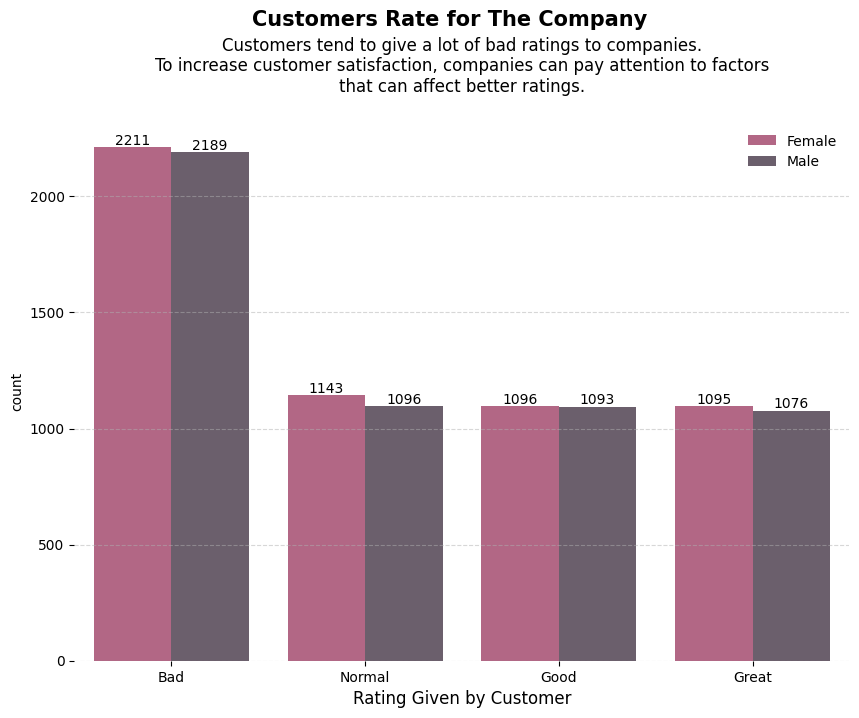

In [106]:
plt.figure(figsize=(10, 7))
ax = plt.gca()
sns.countplot(data=df.replace({'Gender': {'F': 'Female', 'M': 'Male'}}), x='range_rate', hue='Gender', palette=u_colors, order=category_order)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.grid(axis='y', linestyle='--', alpha=0.5)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=10)

plt.suptitle('Customers Rate for The Company', fontsize=15, fontweight='bold', y=1.04)
plt.title('Customers tend to give a lot of bad ratings to companies.\nTo increase customer satisfaction, companies can pay attention to factors\nthat can affect better ratings.', fontsize=12, y=1.04)
plt.xlabel('Rating Given by Customer', font={'family':'sans-serif', 'size':12}, color='black')
plt.legend(loc='upper right', frameon=False)
plt.show()


Dari hasil visualisasi countplot, menunjukkan bahwa rating kategori bad yang diberikan pelanggan kepada perusahaan cenderung memiliki nilai yang tinggi. Dalam hal ini, terlihat bahwa mayoritas pelanggan memberikan rating yang buruk. Untuk meningkatkan kepuasan pelanggan, perusahaan dapat memperhatikan faktor-faktor yang dapat mempengaruhi rating yang lebih baik. Hal ini dapat dilakukan dengan melakukan analisis lebih lanjut terhadap beberapa faktor dan melakukan perbaikan pada aspek-aspek yang perlu ditingkatkan agar pelanggan memberikan rating yang lebih baik. Beberapa hal yang mempengaruhi pelanggan dalam memberikan rating antara lain waktu pengiriman, biaya pengiriman, dan kualitas produk setelah barang diterima.


**Bagaimana persentase pengiriman yang tepat waktu pada perusahaan ini?**

In [107]:
df_reached = df['Reached.Not.on.Time_Y.N'].value_counts().reset_index().rename(columns={'index':'Delivered', 'Reached.Not.on.Time_Y.N':'count'})
df_reached

,Delivered,count
0,1,6563
1,0,4436


In [108]:
fig = go.Figure()

fig.add_trace(go.Pie(labels=df_reached['Delivered'],
                     values=df_reached['count'],
                     name='Late?',
                     marker={'colors': ['#B7B7B7','#3C486B']}))

fig.update_traces(hole=0.7, hoverinfo='label+percent+name')

fig.update_layout(
    title_text='Comparison of The Percentage of On Time\nand Late Deliveries',
    title_x=0.5,
    showlegend=False,
    annotations=[dict(text='Total Shipments', x=0.5, y=0.65, font_size=15, showarrow=False),
                 dict(text=str(df_reached['count'].sum()), x=0.5, y=0.55, font_size=40, showarrow=False),
                 dict(text='On Time', x=0.460, y=0.350, font_size=15, showarrow=False),
                 dict(text='Late', x=0.541, y=0.350, font_size=15, showarrow=False),
                 ]
)

fig.add_shape(type='rect',
              x0=.45,
              x1=.47,
              y0=0.4,
              y1=0.45,
              line={'color':'black', 'width':2},
              fillcolor='#3C486B',
              )

fig.add_shape(type='rect',
              x0=.53,
              x1=.55,
              y0=0.4,
              y1=0.45,
              line={'color':'black', 'width':2},
              fillcolor='#B7B7B7')

fig.show()

- Dari pie chart diatas, menunujukkan perbandingan persentase pengiriman tepat waktu dan pengiriman terlambat pada data yang dihasilkan oleh perusahaan. Pada visualisai ini, dapat dilihat bahwa 59,7 % pengiriman yang ada tidak tepat waktu, sementara 40,3 % pengiriman diterima dengan tepat waktu dimana ini merupakan nilai yang rendah, sehingga dapat dijadikan sebagai fokus untuk perusahaan dalam meningkatkan kualitas layanan pengiriman agar dapat memenuhi kebutuhan dan kepuasan pelanggan. Diperlukan adanya departemen khusus yang menangani masalah pengiriman ini. Kemudian, perusahaan perlu membuat strategic planning agar pengiriman dapat tepat waktu. Peninjauan SLA (Service Level Agreement) juga diperlukan untuk melihat apakah ekspektasi akan suatu pengiriman barang sudah sesuai atau belum. SLA merupakan perjanjian antara pelaku logistik dengan pelanggannya yang berisikan tentang kewajiban dan ekspektasi akan suatu pengiriman barang. Beberapa cara lain untuk meningkatkan efisiensi dalam proses pengiriman adalah memperbaiki sistem manajemen persediaan, meningkatkan kualitas dan kuantitas sumber daya manusia yang terlibat dalam proses pengiriman, serta menggunakan teknologi terkini dalam pemantauan dan pelacakan pengiriman barang.

**Bagaimana tren/ pola pengiriman di berbagai aspek?**

In [109]:
i_color = ['#F9DBBB','#4E6E81']

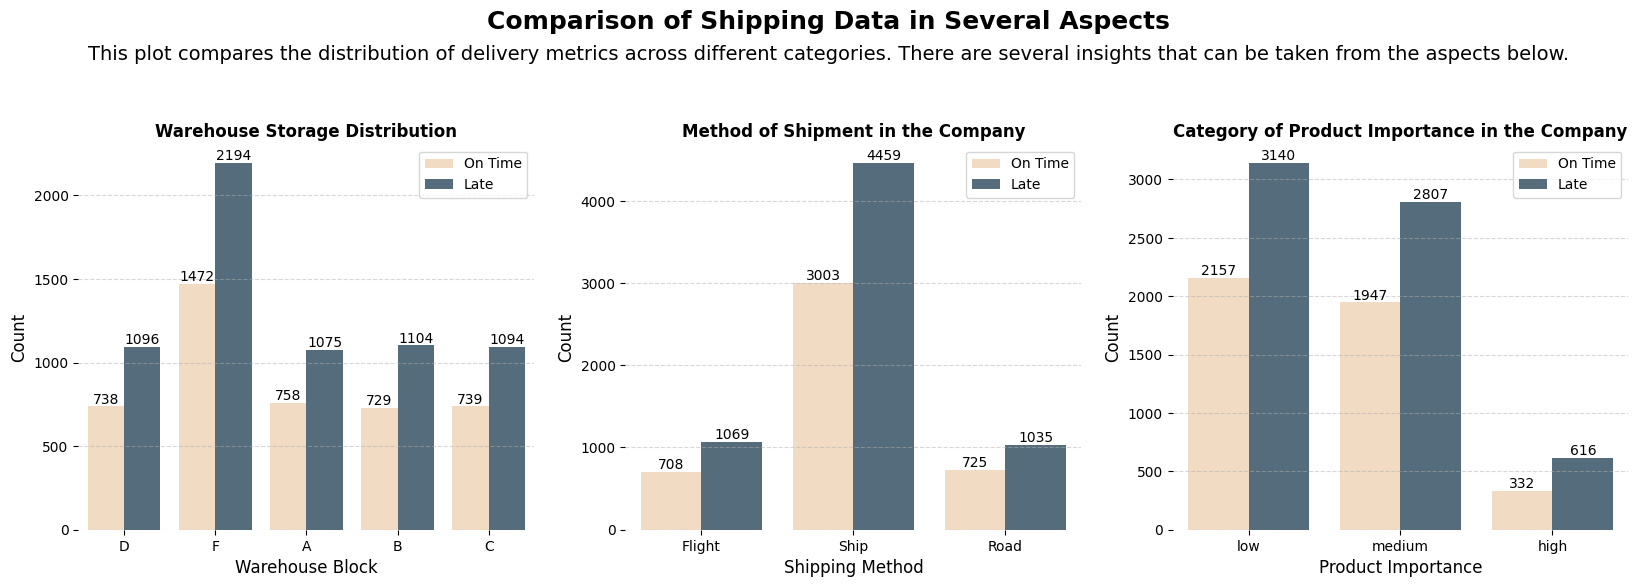

In [110]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))

sns.countplot(data=df, x='Warehouse_block', hue='Reached.Not.on.Time_Y.N', palette=i_color, ax=axs[0])
axs[0].set_title('Warehouse Storage Distribution', fontweight='bold')
axs[0].set_xlabel('Warehouse Block', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[0].set_ylabel('Count', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[0].legend(labels=['On Time', 'Late'])
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].grid(axis='y', linestyle='--', alpha=0.5)


for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.Not.on.Time_Y.N', palette=i_color, ax=axs[1])
axs[1].set_title('Method of Shipment in the Company', fontweight='bold')
axs[1].set_xlabel('Shipping Method', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[1].set_ylabel('Count', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[1].legend(labels=['On Time', 'Late'])
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].grid(axis='y', linestyle='--', alpha=0.5)


for p in axs[1].patches:
    axs[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

sns.countplot(data=df, x='Product_importance', hue='Reached.Not.on.Time_Y.N', palette=i_color, ax=axs[2])
axs[2].set_title('Category of Product Importance in the Company', fontweight='bold')
axs[2].set_xlabel('Product Importance', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[2].set_ylabel('Count', font={'family': 'sans-serif', 'size': 12}, color='black')
axs[2].legend(labels=['On Time', 'Late'])
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['left'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].grid(axis='y', linestyle='--', alpha=0.5)

for p in axs[2].patches:
    axs[2].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.suptitle('Comparison of Shipping Data in Several Aspects', fontsize=18, fontweight='bold', y=1.15)
fig.text(0.5, 1.05, 'This plot compares the distribution of delivery metrics across different categories. There are several insights that can be taken from the aspects below.', ha='center', fontsize=14)

plt.show()


# Analisis Perbandingan Data Pengiriman di Beberapa Aspek

- Warehouse Storage Distribution


Visualisasi countplot Warehouse Storage Distribution menampilkan distribusi jumlah produk pada setiap blok gudang (warehouse block) dan proporsi pengiriman barang yang tepat waktu atau terlambat. Dari grafik tersebut, dapat dilihat bahwa gudang F memiliki jumlah produk terbanyak, sedangkan blok gudang D memiliki jumlah produk paling sedikit dengan presentase terlambat ataupun tepat waktu.

Dapat dilihat bahwa pengiriman barang yang tepat waktu dan terlambat terdistribusi secara merata di 4 blok gudang selain blok F, namun blok gudang F memiliki proporsi pengiriman barang terlambat yang lebih tinggi dibandingkan dengan blok gudang lainnya.
Blok F merupakan warehouse pusat dengan produktifitas yang sangat tinggi. Kondisi pada warehouse F didapatkan sering terjadi penumpukan barang, didapatkan kecepatan dan waktu penanganan produk pada gudang F belum disesuaikan dengan kuantitas produk.

Analisa dari grafik ini dapat digunakan perusahaan untuk mengevaluasi dan mengoptimalkan strategi penerimaan, pemindahan, penyimpanan, pengambilan, pengemasan, dan pengiriman barang di gudang pusat dan mempertimbangkan pengaturan ulang agar dapat mengoptimalkan pengiriman barang yang tepat waktu menyesuaikan dengan produktifitas warehouse. 

Perlu dilakukan peninjauan lokasi warehouse, kapasitas dan kecepatan handling dan aspek lainnya, semisal perusahaan dapat mempertimbangkan untuk memindahkan beberapa stock barang dari blok F ke blok lainnya untuk memperbaiki efisiensi penyimpanan dan pengiriman barang.

- Mode Pengiriman di Perusahaan

Countplot diatas menunjukkan distribusi Mode of Shipment pada perusahaan berdasarkan jumlah pengiriman menggunakan setiap metode pengiriman, Berdasarkan grafik, dapat dilihat bahwa mode pengiriman terbanyak adalah Ship sebesar 7462 pengiriman, sementara Flight dan Road memiliki nilai yang tidak jauh berbeda yaitu Flight sebesar 1777 pengiriman, kemudian Road sebesar 1760. Namun, terlihat juga bahwa pengiriman dengan menggunakan Ship/ laut memiliki persentase pengiriman yang lebih tinggi dan terlambat dibandingkan dengan pengiriman melalui Road maupun Flight. Pengiriman via laut memang umumnya lebih murah. Akan tetapi jenis armada ini tidak direkomendasikan untuk perputaran yang cepat. Kelebihan pengiriman via laut ini lebih fleksibel. Misalnya kita bisa mengirimkan jenis barang yang tidak bisa dikirimkan melalui pengiriman via lain, seperti barang elektronik ukuran besar dan baterai dalam keadaan aktif. Meski flight umumnya lebih cepat. Berikutnya adalah flight dan road, meskipun flight umumnya memiliki waktu pengiriman yang lebih cepat. Namun, strategi yang salah juga menyebabkan pengiriman via flight memakan waktu yang lama. Apabila cargo dari armada udara belum terpenuhi maka armada udara cenderung memilih cargo dalam skala besar untuk segera dikirimkan dan sehingga pengiriman via udara akan tertunda. Begitu juga road, memiliki kelebihan yaitu cocok untuk jarak pendek, pengiriman cargo bisa dilacak secara real time, serta fleksibel jadwal dan volume. Namun, via darat memiliki kekurangan yaitu tidak cocok untuk pengiriman jarak jauh, harus menunggu loading barang, dan masalah lalu lintas.

Perusahaan perlu lebih cerdas memperhitungkan armada apa yang dipilih. Karakteristik barang, alur pengiriman barang, kelebihan dan kekurangan masing-masing jalur darat, laut maupun udara juga dapat dijadikan acuan dalam pembuatan strategic planning pengiriman. Ketersediaan ruang cargo juga menjadi faktor penting untuk memilih jenis cargo. Untuk pengiriman barang dengan volume kecil namun bernilai tinggi, mode flight atau udara dapat menjadi solusi. Namun, untuk barang yang memiliki volume besar, via laut adalah solusinya karena via laut memiliki lebih banyak ruang.

Inovasi keterlambatan pengiriman pada barang yang dikirimkan jalur darat/ road dapat menggunakan delivery drone. Inovasi ini sangat cocok untuk pengiriman ke daerah perkotaan yang padat penduduk, dimana lalu lintas dan parkir dapat menjadi hambatan utama bagi kendaraan pengiriman berbasis darat. Perusahaan yang sudah berinvestasi dalam pengembangan seperti Amazon, UPS, dan DHL.



- Product importance

Visualisasi grafik diatas menunjukkan distribusi jumlah produk yang dikirim dalam tiga kategori (low, medium, high) dengan jumlah produk yang sampai tepat waktu atau terlambat.

Sebagian besar produk yang terlambat memiliki tingkat kepentingan low. Persentase keterlambatan dari product_importance low adalah sebesar 65 % dari total pengiriman product importance low.  Sementara, persentase keterlambatan medium dan high adalah sebesar 59% dari masing-massing total pengiriman medium dan high. Dari grafik ini produk dengan tingkat kepentingan lebih tinggi akan memerlukan waktu pengiriman yang lebih cepat atau pengiriman express untuk memenuhi kebutuhan pelanggan. Produk dengan tingkat kepentingan lebih tinggi mungkin membutuhkan metode pengemasan yang lebih aman dan hati-hati untuk memastikan pengemasan yang lebih aman. Produk dengan tingkat kepentingan tinggi mungkin memerlukan pemantauan pengiriman yang lebih teliti, seperti pelacakan pengiriman secara real-time atau penanganan khusus selama proses pengiriman. Masing-masing product importance seharusnya sudah disesuaikan dengan penanganan barang masing-masing. Perlu dilakukan strategic planning agar segala kategori barang datang tepat pada waktunya sesusai perhitungan estimasi. Evaluasi metode pengiriman yang sesuai dengan tingkat kepentingan, peningkatan pemantauan, sesuaikan penanganan barang dengan tingkat kepentingan barang, memastikan produk dengan tingkat kepentingan tinggi dikemas dengan baik dan aman. Peningkatan kerjasama dengan pemasok dan mitra logistik, dan analisi pemantauan kinerja.

**Apakah diskon mempengaruhi dengan pengiriman produk?**

In [111]:
u_colors = ['#009FBD','#FA9884']

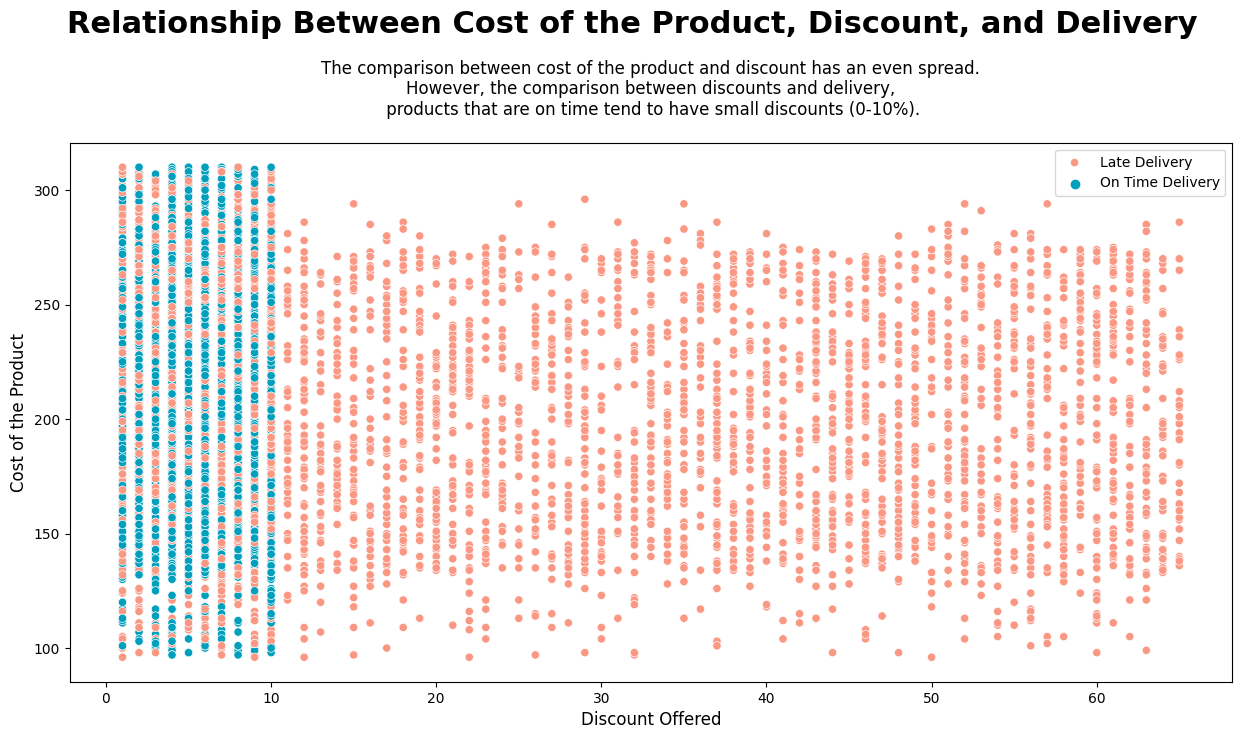

In [112]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x='Discount_offered', y='Cost_of_the_Product', data=df, hue='Reached.Not.on.Time_Y.N', palette=u_colors)
plt.suptitle('Relationship Between Cost of the Product, Discount, and Delivery', fontsize=22, fontweight='bold', y=1.07)
plt.title('The comparison between cost of the product and discount has an even spread.\nHowever, the comparison between discounts and delivery,\n products that are on time tend to have small discounts (0-10%).', pad=20)
plt.xlabel('Discount Offered', font={'family':'sans-serif','size':12},color='black')
plt.ylabel('Cost of the Product', font={'family':'sans-serif','size':12}, color ='black')

plt.legend(labels=['Late Delivery', 'On Time Delivery'])

plt.show()


- Visualisasi scatterplot hubungan antara diskon, harga produk, dan pengiriman tepat waktu maupun terlambat. Hubungna Harga produk dengan diskon yang ditawarkan tersebar merata tidak ada kecenderungan tertentu. Sementara, hubungan antara diskon yang ditawarkan dengan pengiriman barang menunjukkan bahwa barang yang tidak tepat waktu cenderung memiliki diskon yang kecil (sekitar 0 - 10%). Kemungkinan bahwa produk dengan diskon lebih besar  cenderung lebih banyak diminati oleh pelanggan sehingga mengakibatkan volume pesanan yang meningkat maka kemungkinan terjadinya keterlambatan akan lebih tinggi. Apabila terdapat keterbatasan sumber daya atau kapasitas pengiriman perusahaan cenderung memprioritaskan pengiriman untuk produk yang tidak memiliki diskon atau diskon rendah. Solusinya bisa saja perusahaan mengatur ketersediaan stok dan kapasitas pengiriman agar bisa menangani volume pesanan yang lebih besar dengan lebih efektif dan efisien. Solusi dari masalah ini dengan mengevaluasi kapasitas pengiriman dapat mengakomodasi permintaan produk dengan diskon pengiriman yang tinggi. Perusahaan perlu memastikan bahwa infrastruktur logistik yang cukup tersedia untuk menjaga pengiriman tepat waktu. Perencanaan pengiriman yang lebih terperinci dan efektif untuk produk dengan diskon pengiriman tinggi. Sehingga, walaupun produk memiliki diskon yang tinggi, seharusnya memiliki penanganan yang sama untuk pengiriman tepat waktu.

In [117]:
color_o = ["#B7B7B7", "#B7B7B7", "maroon", "#B7B7B7", "#B7B7B7", "#B7B7B7"]

**Dalam setiap keluhan customer, berdasar data secara garis besar berapa kali customer melakukan panggilan untuk menyelesaikan keluhan yang ia hadapi?**

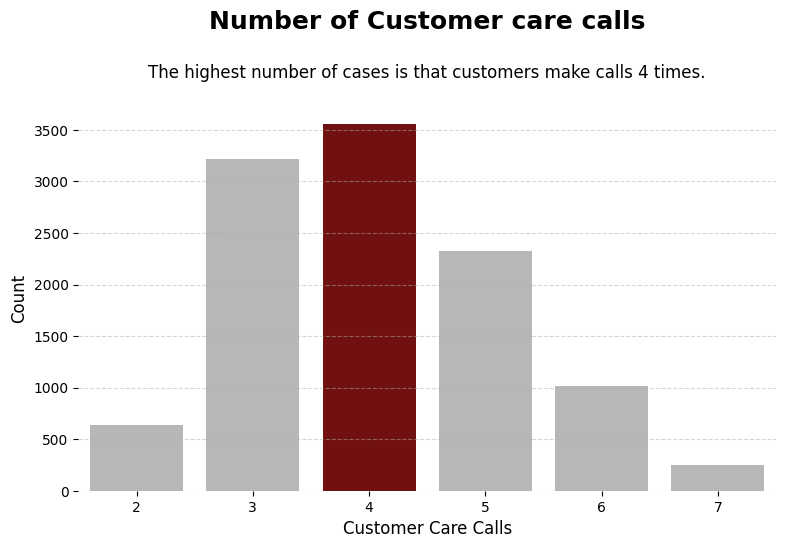

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

customer_care = df["Customer_care_calls"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(x=customer_care.index, y=customer_care.values, palette=color_o)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylabel("Count", fontweight='light', fontsize=12, color='black')
plt.xlabel("Customer Care Calls", fontweight='light', fontsize=12, color='black')

plt.title("The highest number of cases is that customers make calls 4 times.", font={'family':'sans-serif','size':12}, color='black', pad=20)
plt.text(0.5, 1.2, "Number of Customer care calls", transform=ax.transAxes, fontweight='bold', font={'family':'sans-serif','size':18}, color='black', ha='center')


plt.show()


- Dari grafik diatas didapatkan jumlah pengulangan menelpon pelanggan yang paling banyak ditemui adalah sebanyak 4 kali. Hal ini tentunya dapat menjadi perbaikan perusahaan dimana dalam bidang customer care calls hal ini berkaitan dengan tingkat kepuasan customer. Terdapat suatu parameter yang disebut dengan FCR (First Call Resolution) merupakan metrik yang mengungkapkan seberapa baik dan bagusnya pelayanan dari agent customer service dalam menyelesaikan masalah, menjawab pertanyaan, dan kebutuhan pelanggan selama interaksi pertama melalui telepon. Sederhananya, FCR ini metrik yang menandakan tingkat keberhasilan agent customer service saat menangani masalah melalui panggilan pertama. Pelanggan seringkali mendapat permasalahan yang rumit dan membutuhkan bantuan dengan cara menelpon customer care. Hal tersebut mereka lakukan untuk mendapatkan solusi secara cepat dan tepat. Nilai yang paling banyak ditemui adalah 4 kali menelpon menandakan kebanyakan masalah tidak bisa diselesaikan dalam 1 iterasi, sehingga hasilnya merupakan nilai FCR yang buruk. Hal ini dapat juga disebabkan oleh service dari customer care maupun permasalahan pengiriman yang belum juga selesai. Dalam aspek customer service perusahaan dapat memperbaiki SDM dari customer care tersebut. Dengan respon yang baik dan sesuai, kepuasan pelanggan akan meningkat bahkan dapat meningkatkan customer retention.

**Kesimpulan dan Rekomendasi**

**Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan tentang data yang ada:**
1. Tingkat penilaian pelanggan terhadap perusahan menunjukkan penilaian yang buruk. Oleh karena itu, perusahaan perlu melakukan improvement faktor-faktor yang dapat mempengaruhi peningkatan penilaian yang lebih baik untuk meningkatkan kepuasan pelanggan.
2. Persentase pengiriman tepat waktu dan terlambat terlihat bahwa persentase pengiriman terlambat jauh lebih tinggi daripada pengiriman tepat waktu yaitu 40,3 % pengiriman tepat waktu, sementara 59,7 % pengiriman terlambat. 
3. Distribusi data pengiriman memiliki pola/ tren masing - masing dari berbagai aspek. Mulai dari warehouse block F terdapat warehouse pusat dengan pengiriman terlambat tertinggi, mode of shipment dengan armada laut memiliki persentase keterlambatan tertinggi, dan product importance dengan kategori low memiliki persentase keterlambatan tertinggi.
4. Hubungan antara biaya produk dengan diskon tersebar secara merata. Sementara, hubungan antara produk yang tepat waktu cenderung memiliki diskon yang kecil (0%-10%).
5. Perusahaan memiliki nilai FCR yang buruk dimana paling banyak ditemui kasus bahwa customer care tidak bisa menyelesaikan dalam 1 iterasi, bahkan dari data yang ada jumlah kasus tertinggi yang ditemui kebanyakan sebesar 4 kali telpon.

**Rekomendasi**

1. Perusahaan perlu melakukan analisis mendalam mengenai faktor-faktor yang menyebabkan penilaian buruk dan penanganannya. Hal ini bisa meliputi peningkatan efisiensi pengiriman, peningkatan kualitas penanganan produk sesuai product importance, dan layanan pelanggan yang lebih baik.
2. Perusahaan perlu mengevaluasi dan meningkatkan proses pengiriman mereka. Diantaranya dengan peningkatan meninjau kembali apakah performance dari SLA pengiriman telah sesuai, pengecekan kecepatan pengiriman, tim strategic planning dapat membuat rencana yang lebih efektif agar pengiriman tidak terlambat, apabila memang waktu yang dibutuhkan untuk pengiriman barang lebih lama, maka berikan perjanjian dengan waktu yang sesuai. Kemudian, manajemen rantai pasokan, pengoptimalan rute pengiriman, peningkatan komunikasi antara perusahaan pengirim, dan mitra logistik.
3. Mengoptimalkan strategi penerimaan, pemindahan, penyimpanan, pengambilan, pengemasan, dan pengiriman barang di gudang pusat dan pemanfaatan merata gudang lainya. Mempertimbangkan pengaturan ulang agar dapat mengoptimalkan pengiriman barang yang tepat waktu menyesuaikan dengan produktifitas warehouse.  Optimalkan pengelolaan persediaan dengan metode just-in-time (JIT) untuk mengurangi persediaan yang tidak perlu. Peningkatan pengaturan ruang gudang. Peninjauan ulang proses operasional gedung dengan mengidentifikasi area di mana ada kemacetan dan kebocoran waktu. Pertimbangkan untuk memperkenalkan perubahan proses atau memanfaatkan teknologi seperti sistem manajemen rantai pasokan(supply chain management) yang terintregasi. 

    Perusahaan perlu lebih cerdas memperhitungkan armada apa yang dipilih. Karakteristik barang, alur pengiriman barang, kelebihan dan kekurangan masing-masing jalur darat, laut maupun udara juga dapat dijadikan acuan dalam pembuatan strategic planning pengiriman. 

    Perlu dilakukan strategic planning agar segala kategori barang datang tepat pada waktunya sesusai perhitungan estimasi. Evaluasi metode pengiriman yang sesuai dengan tingkat kepentingan, peningkatan pemantauan, kualitas pengemasan dan penanganan yang sesuai dengan tingkat kepentingan. Peningkatan kerjasama dengan pemasok dan mitra logistik, dan analisi pemantauan kinerja. Penanganan pengemasan maupun penerimaan yang berbeda sesuai tingkat kepentingan produk karena karakteristik produk yang berbeda. Namun, untuk aspek delivery seharusnya antar karakteristik produk tetap dapat diterima tepat waktu sesuai dengan perhitungan estimasi masing-masing product importance.

4. Perusahaan perlu memberikan layanan barang tepat waktu pada beragam diskon, tidak ada kecenderungan barang tepat waktu hanya pada diskon tertentu. Seharusnya, produk dengan beragam diskon tetap dapat sampai tepat waktu.

5. Dilakukan perbaikan dari segi SDM Customer Care bisa dengan pelatihan sesuai bidang, Customer Quality Assurance (CQA), pemberian penghargaan dan intensif untuk karyawan berprestasi. Kemudian, juga diimbangi perbaikan dari aspek delivery barang.

**Referensi:**

- https://www.sqmgroup.com/resources/library/blog/fcr-metric-operating-philosophy
- https://www.mainmain.id/r/17994/amazon-prime-air-siap-luncurkan-layanan-pengiriman-dengan-drone